# LakeMon-LST
## Processing ECOSTRESS - -70 m


LST Land Surface 
Temperature F

(bands 1 -5) 
QC Quality Control (16-bit) n/a 
LST_err LST Uncertainty K


EmisWB Wideband Emissivity 
(8 – 12.5 micron) 

Multispectral information  

Bandwidth Wavelength (μm) 
(μm) 
8.29 0.355 
8.80 0.309 
9.20 0.395 
10.6 0.553 
12.09 0.610 


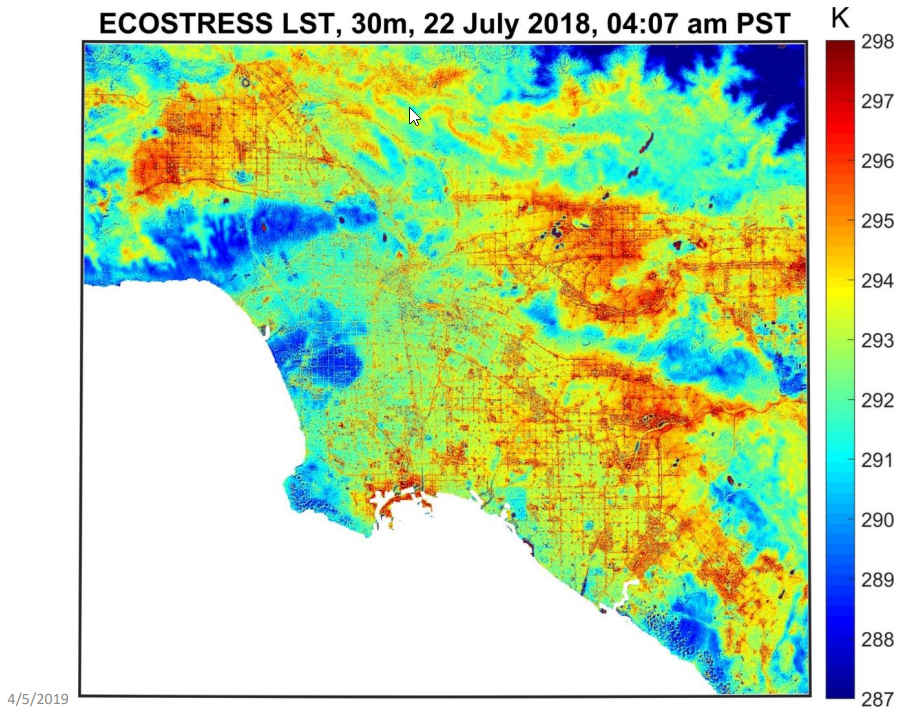



In [ ]:
### Create today's folder & move old stuff out. 

In [2]:
#python
import os
from datetime import date

try:
    from rasterstats import zonal_stats
except:
    !python -m pip install rasterstats 
    from rasterstats import zonal_stats
    
input_path = "/home/osboxes/inDir/"

today = date.today()

if not os.path.exists(input_path + str(today)):
        os.makedirs(input_path + str(today))
        
if not os.path.exists(input_path + str(today) + "/tif_in"):
        os.makedirs(input_path + str(today) + "/tif_in")
        
print("ok")

     |████████████████████████████████| 15.2MB 3.7MB/s eta 0:00:01    |█▌                              | 696kB 4.4MB/s eta 0:00:04     |█████████▉                      | 4.7MB 4.4MB/s eta 0:00:03     |█████████████████████████▌      | 12.1MB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 92kB 3.7MB/s eta 0:00:01
  Created wheel for simplejson: filename=simplejson-3.17.0-cp37-none-any.whl size=55461 sha256=65b648fd647cd005f01241bff25a7ffc22a9332efd37a33f8e06cd74069fb010
  Stored in directory: /home/osboxes/.cache/pip/wheels/86/c0/83/dcd0339abb2640544bb8e0938aab2d069cef55e5647ce6e097
Successfully built simplejson
ok


In [9]:

print(len(os.listdir(input_path)))

for file in os.listdir(input_path):
    if "tif" in file:
        os.system("saga_cmd io_gdal 0 -GRIDS=" + file + " -FILES=./" + file + " -SELECTION -SELECT_SORT -RESAMPLING=3")

        
            

90
dl = https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/168091c5-fb15-4758-a1fe-295cc3930b33/693f471f-01eb-4999-9c85-48c749dc43df/ECO2LSTE.001_SDS_LST_doy2019206080328_aid0001.tif
dl = https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/168091c5-fb15-4758-a1fe-295cc3930b33/693f471f-01eb-4999-9c85-48c749dc43df/ECO2LSTE.001_SDS_LST_doy2019206080328_aid0001.tif
dl = https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/168091c5-fb15-4758-a1fe-295cc3930b33/19ac5dd7-7e51-417a-927b-174ff13a75d5/ECO2LSTE.001_SDS_LST_doy2019206230350_aid0001.tif
dl = https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/168091c5-fb15-4758-a1fe-295cc3930b33/f5a077a1-f8b9-478d-8571-c81f18b6570d/ECO2LSTE.001_SDS_LST_doy2019206230442_aid0001.tif
dl = https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/168091c5-fb15-4758-a1fe-295cc3930b33/f5a077a1-f8b9-478d-8571-c81f18b6570d/ECO2LSTE.001_SDS_LST_doy2019206230442_aid0001.tif
dl = https://lpdaacsvc.cr.usgs.gov/appeears/api/bundle/168091c5-fb15-4758-a1fe-295cc3930b33/dbb06168-4

## Create List of Grids in file;file;file format for saga GIS...

In [12]:
GRIDS = ""

for file in os.listdir(input_path):
    if "sgrd" in file:
        GRIDS = GRIDS + file + ";"
GRIDS


'ECO2LSTE.001_SDS_LST_doy2019206044847_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205040357_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205004539_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205035733_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205235416_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019206030643_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205035641_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019206013119_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205084759_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205085127_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205085318_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205040449_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019206012843_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205004211_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019206045215_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205004631_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019206062233_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205021853_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy2019205053858_aid0001.sgrd;ECO2LSTE.001_SDS_LST_doy201920

### Create a Mosaic the grids from the GRIDS input list (Will take long time)


In [13]:
os.system("saga_cmd grid_tools 3 -GRIDS=" + '"'  + GRIDS + '"' + " -TYPE=7 -RESAMPLING=3 -OVERLAP=1 -MATCH=0 -TARGET_DEFINITION=0 -TARGET_USER_SIZE=0.000630 -TARGET_USER_XMIN=-126.351710 -TARGET_USER_XMAX=-70.101882 -TARGET_USER_YMIN=26.015462 -TARGET_USER_YMAX=48.655960 -TARGET_USER_FITS=0 -TARGET_OUT_GRID=./Mosaic.sgrd")

0

### Convert the Saga GRID to GeoTiff format  (Will take long time)

In [14]:
os.system("saga_cmd io_gdal 2 -GRIDS=./Mosaic.sgrd -FILE=./Mosaic.tif")

saga_cmd io_gdal 2 -GRIDS=./Mosaic.sgrd -FILE=./Mosaic.tif


### Clip the Mosaic with the Lake Polygons  (Will take long time)

In [19]:
os.system("saga_cmd shapes_grid 7 -OUTPUT=" + input_path + "Clipped.sgrd -INPUT=" + input_path + "Mosaic.sgrd -POLYGONS=" + input_path + "geometry.shp")

0

### tool: Export GeoTIFF

In [ ]:
os.system("saga_cmd io_gdal 2 -GRIDS=./Clipped.sgrd -FILE=./Clipped.tif")

In [ ]:
# Get file names
input = input_path + "Clipped.tif"
output = input_path + "temps" + "-" + str(today)+ ".tif"
input 
output

### Use Raster Calculator to Calculate Temperature in F

In [ ]:
os.system('gdal_calc.py -A '+ input + ' --outfile=' + output + ' --calc="(((A*0.02)-272)*(9/5))+32" --NoDataValue=0')


### Collect Zonal Stats && Output to GeoJSON

In [ ]:
from rasterstats import zonal_stats

stats = zonal_stats("/mnt/master/lakes/geometry.shp", "temps-" + str(today) + ".tif",
            stats="median", geojson_out=True)

import json
with open('temperature.geojson', 'w') as outfile:
   json.dump(result, outfile) # or geojson.dump(result, outfile)

### This function takes a UUID and CUTS it with a Shapefile (CUTLINE)

#### It also reprojects if necc. and creates a contour shapefile

In [ ]:
def proccess_uuid(UUID):
        CUTLINE="/home/ubuntu/geoservelakes/workspaces/master/lakes/" + UUID + ".shp"
        GEOTIFF_IN=input_path + "Clipped.tif"
        GEOTIFF_OUT=input_path + today + "/tif/" + UUID + ".tif"
        COUNTOUR_OUT=input_path + today + "/tif/" + UUID + ".shp"
        os.system("gdalwarp   -s_srs EPSG:4326 -t_srs EPSG:4326  -of GTiff  -cutline "+ CUTLINE + " -crop_to_cutline  -dstalpha  " + GEOTIFF_IN   + " " +    GEOTIFF_OUT)
        os.system("gdal_edit.py       -a_srs EPSG:4326 " +       GEOTIFF_OUT)
        os.system('gdal_contour -b 1 -a ECO_LST_F -i 3.0 -f "ESRI Shapefile" ' + GEOTIFF_OUT + " " + COUNTOUR_OUT)
        print( "done processing " +  UUID)
        return

### multithreaded image processing - worker function

In [ ]:
def img_worker():
    files= os.listdir("/home/ubuntu/geoservelakes/workspaces/master/lakes/")
    files.reverse()
    for file in files:
        if "shp" in file:
            process=True
            UUID= file.replace(".shp","")
            for f in os.listdir("/home/ubuntu/Downloads/2019-07-27/tif/"):
                    if "shp" in f and UUID in f:
                        print("already processed")
                        process = False
            if process:
                print("new-process")
                proccess_uuid(UUID)

### create 22 threads to process in parallel

In [ ]:
threads = []

for i in range(22):
    t = threading.Thread(target=worker)
    threads.append(t)
    t.start()